In [1]:
# Copyright 2019 The Authors. All Rights Reserved.
#
# GNU General Public License v3.0
# Permissions of this strongest copyleft license are conditioned on 
# making available complete source code of licensed works and modifications, 
# which include larger works using a licensed work, under the same license. 
# Copyright and license notices must be preserved. 
# Contributors provide an express grant of patent rights. 
# When a modified version is used to provide a service over a network, 
# the complete source code of the modified version must be made available.
# ==============================================================================

# Title: Clustering of CRISPR spacers using Autoencoders
# Author: Hyunjin Shim
# Date created: 20190813
# Email: jinenstar@hotmail.com

# Clustering CRISPR spacers using Autoencoders

- to analyze CRISPR spacers/units from https://crispi.genouest.org/
- to cluster CRISPR spacers/units by type
- to perform dimensionality reduction to identify patterns
- to visualize the results after each experimentation
- to assess the best possible network architecture

# Dataset description
- Archaea: 15591 spacers
- Bacteria 67838 spacers

# Step 1: Load and preprocess raw data

In [2]:
# Data
import os
import pandas as pd
import numpy as np

# Biopython
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

# Regular expression
import re

# Plot
from pylab import *
import pylab as pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import matplotlib.patches as mpatches

# Tensorflow
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model

# sklearn
from sklearn.model_selection import train_test_split


env: OPENBLAS_NUM_THREADS=6
env: OMP_NUM_THREADS=6
env: MKL_NUM_THREADS=6
env: NUMEXPR_NUM_THREADS=6


Using TensorFlow backend.


In [128]:
# location of raw data file
datapath = '/Users/jinenstar/Desktop/Data/CRISPR'
os.chdir(datapath)

# use Biopython to process and parse sequences
file_in ='archaea_spacer.txt'

with open(file_in) as fasta_file:  # Will close handle cleanly
    all_ID_ar_spacer = []
    all_sequence_ar_spacer = []
    all_length_ar_spacer = []
    all_des_ar_spacer = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        # remove .id from .description record (remove all before first space)
        #seq_record.description=' '.join(seq_record.description.split()[1:])
        # a list of IDs and sequences
        all_des_ar_spacer.append(seq_record.description)
        all_ID_ar_spacer.append(seq_record.id)
        all_sequence_ar_spacer.append(seq_record.seq)
        all_length_ar_spacer.append(len(seq_record.seq))

# find maximum seq length
max_length_ar_spacer = max(all_length_ar_spacer)
min_length_ar_spacer = min(all_length_ar_spacer)

In [131]:
print(seq_record)

ID: ref|NC_014537|
Name: ref|NC_014537|
Description: ref|NC_014537|  Vulcanisaeta distributa DSM 14429 chromosome 1601737-1601789
Number of features: 0
Seq('GCCGGCCCAGACTCATGTTACTGCAAACTCGAGGGGATTGGGTGCACGCAGAT', SingleLetterAlphabet())


In [8]:
print(min_length_ar_spacer)
print(all_length_ar_spacer.index(min_length_ar_spacer))
#all_ID[all_length_ar_spacer.index(min_length_ar_spacer)]

4
11232


In [9]:
print(max_length_ar_spacer)
print(all_length_ar_spacer.index(max_length_ar_spacer))
#all_ID_ar_spacer[all_length_ar_spacer.index(max_length_ar_spacer)]

488
5094


In [10]:
all_ID_ar_spacer[-10:]

['ref|NC_014537|',
 'ref|NC_014537|',
 'ref|NC_014537|',
 'ref|NC_014537|',
 'ref|NC_014537|',
 'ref|NC_014537|',
 'ref|NC_014537|',
 'ref|NC_014537|',
 'ref|NC_014537|',
 'ref|NC_014537|']

In [13]:
all_sequence_ar_spacer[-10:]

[Seq('TAAAGCAGTCTATCAAGCATTCCGTGATTTCCTTAAGGAAAG', SingleLetterAlphabet()),
 Seq('AAAGATGGTGCCAGTATTGCCAGGCAATGAAATTCATGATGGTTT', SingleLetterAlphabet()),
 Seq('AATACAATAATAAGAGTCCCTGCGGACCCTAACGGTAAGCCGACAG', SingleLetterAlphabet()),
 Seq('TACTGTGAATGCGTTGAATGTCAACACAGCTACTTACCAGCAAA', SingleLetterAlphabet()),
 Seq('TCAGTAGTCATTATGATGTACTGCCAGACGGCCATTCCCCTATTGT', SingleLetterAlphabet()),
 Seq('GTGTCTAAAAATGACGATGCATGTGAGTGGTTTAAGGCGTGGTTGACA', SingleLetterAlphabet()),
 Seq('TCGTTAAAAGATACGGGGCAGGAAATAATGACATTTGAAGAGGGATTA', SingleLetterAlphabet()),
 Seq('ATTCCTAATCACCTACACCTCAAATTCGCAGGTAATGGAATAACTTCG', SingleLetterAlphabet()),
 Seq('AAAAACTTATAAATCAGTCCTGAGCAAAAACAATGTATGAAAGAAA', SingleLetterAlphabet()),
 Seq('GCCGGCCCAGACTCATGTTACTGCAAACTCGAGGGGATTGGGTGCACGCAGAT', SingleLetterAlphabet())]

In [132]:
# location of raw data file
datapath = '/Users/jinenstar/Desktop/Data/CRISPR'
os.chdir(datapath)

# use Biopython to process and parse sequences
file_in ='bacteria_spacer.txt'

with open(file_in) as fasta_file:  # Will close handle cleanly
    all_ID_ba_spacer = []
    all_sequence_ba_spacer = []
    all_length_ba_spacer = []
    all_des_ba_spacer = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        # remove .id from .description record (remove all before first space)
        #seq_record.description=' '.join(seq_record.description.split()[1:])
        # a list of IDs and sequences
        all_des_ba_spacer.append(seq_record.description)
        all_ID_ba_spacer.append(seq_record.id)
        all_sequence_ba_spacer.append(seq_record.seq)
        all_length_ba_spacer.append(len(seq_record.seq))

# find maximum seq length
max_length_ba_spacer = max(all_length_ba_spacer)
min_length_ba_spacer = min(all_length_ba_spacer)

In [15]:
print(seq_record)

ID: ref|NC_022900|
Name: ref|NC_022900|
Description: ref|NC_022900|  Zymomonas mobilis subsp. mobilis str. CP4 = NRRL B-14023 1794820-1794851
Number of features: 0
Seq('GCCAATTTTTCAGCATAACGTCGCAGCTCAAC', SingleLetterAlphabet())


In [16]:
print(min_length_ba_spacer)
print(all_length_ba_spacer.index(min_length_ba_spacer))
#all_ID_ba_spacer[all_length_ba_spacer.index(min_length_ba_spacer)]

2
47107


In [17]:
print(max_length_ba_spacer)
print(all_length_ba_spacer.index(max_length_ba_spacer))
#all_ID_ba_spacer[all_length_ba_spacer.index(max_length_ba_spacer)]

946
65581


In [18]:
all_ID_ba_spacer[-10:]

['ref|NC_022900|',
 'ref|NC_022900|',
 'ref|NC_022900|',
 'ref|NC_022900|',
 'ref|NC_022900|',
 'ref|NC_022900|',
 'ref|NC_022900|',
 'ref|NC_022900|',
 'ref|NC_022900|',
 'ref|NC_022900|']

In [19]:
all_sequence_ba_spacer[-10:]

[Seq('CGACCGTTACGATCAACGATATCGGCGCGCGCCTGCAACGGCGCAACGGGTGGA...GTG', SingleLetterAlphabet()),
 Seq('GAAGGATTTTTGCCCGGGACAAAAT', SingleLetterAlphabet()),
 Seq('CAGCTTTGCGCTTTAGCGTTGCGG', SingleLetterAlphabet()),
 Seq('CTCCAAGAAGAGATCGCAACCGAG', SingleLetterAlphabet()),
 Seq('AAAAGACACGATATGCGATGTGGC', SingleLetterAlphabet()),
 Seq('GCGTGTCTTCGATAATAACTCTGCGACGATC', SingleLetterAlphabet()),
 Seq('CGACAGTCGGGCCGGATACCATGATCCGAGT', SingleLetterAlphabet()),
 Seq('AAGGTAATATTATCGTCACTGACAAGCAAGG', SingleLetterAlphabet()),
 Seq('TCTTGTGACATTGCTGGCTTTGCTTGAGCAT', SingleLetterAlphabet()),
 Seq('GCCAATTTTTCAGCATAACGTCGCAGCTCAAC', SingleLetterAlphabet())]

In [20]:
# genetic sequence into numerical values: replace('A','1').replace('C','2').replace('G','3').replace('T','4').replace('N','0').replace('n','0')
all_sequence_no_ar_spacer = []
for i in range(len(all_sequence_ar_spacer)):
    all_sequence_no_ar_spacer.append(str(all_sequence_ar_spacer[i]).replace('T','1').replace('A','2').replace('G','3').replace('C','4').replace('t','1').replace('a','2').replace('g','3').replace('c','4').replace('N','0').replace('n','0').replace('K','0').replace('Y','0').replace('M','0').replace('R','0').replace('W','0').replace('S','0').replace('H','0').replace('B','0').replace('k','0').replace('y','0').replace('m','0').replace('r','0').replace('w','0').replace('s','0').replace('b','0').replace('h','0'))

In [21]:
# genetic sequence into numerical values: replace('A','1').replace('C','2').replace('G','3').replace('T','4').replace('N','0').replace('n','0')
all_sequence_no_ba_spacer = []
for i in range(len(all_sequence_ba_spacer)):
    all_sequence_no_ba_spacer.append(str(all_sequence_ba_spacer[i]).replace('T','1').replace('A','2').replace('G','3').replace('C','4').replace('t','1').replace('a','2').replace('g','3').replace('c','4').replace('N','0').replace('n','0').replace('K','0').replace('Y','0').replace('M','0').replace('R','0').replace('W','0').replace('S','0').replace('B','0').replace('H','0').replace('k','0').replace('y','0').replace('m','0').replace('r','0').replace('w','0').replace('s','0').replace('b','0').replace('h','0'))

In [22]:
all_sequence_no = all_sequence_no_ar_spacer + all_sequence_no_ba_spacer

In [23]:
# dictionary to DataFrame
all_ID = all_ID_ar_spacer + all_ID_ba_spacer
all_length = all_length_ar_spacer + all_length_ba_spacer

all_label_ar_spacer = [0] * len(all_sequence_ar_spacer)
all_label_ba_spacer = [1] * len(all_sequence_ba_spacer)
all_label = all_label_ar_spacer + all_label_ba_spacer

all_keyword_ar_spacer = ['Archaea'] * len(all_sequence_ar_spacer)
all_keyword_ba_spacer = ['Bacteria'] * len(all_sequence_ba_spacer)
all_keyword = all_keyword_ar_spacer + all_keyword_ba_spacer

d = {'ID':all_ID, 'Category':all_keyword, 'Label':all_label, 'Length':all_length}
all_data = pd.DataFrame(d)

In [24]:
all_data

,ID,Category,Label,Length
0,ref|NC_015518|,Archaea,0,33
1,ref|NC_015518|,Archaea,0,35
2,ref|NC_015518|,Archaea,0,35
3,ref|NC_015518|,Archaea,0,34
4,ref|NC_015518|,Archaea,0,36
5,ref|NC_015518|,Archaea,0,34
6,ref|NC_015518|,Archaea,0,34
7,ref|NC_015518|,Archaea,0,35
8,ref|NC_015518|,Archaea,0,34
9,ref|NC_015518|,Archaea,0,34


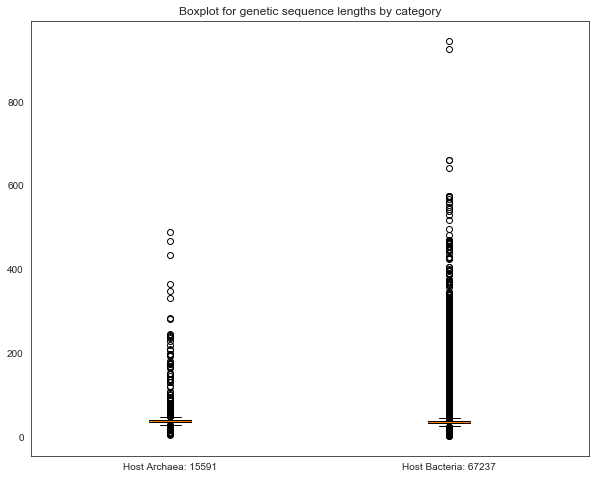

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

data_archaea = all_data[all_data['Label']==0]
len_archaea = len(data_archaea)
data_bacteria = all_data[all_data['Label']==1]
len_bacteria = len(data_bacteria)

# boxplot
data_plot = [data_archaea['Length'],data_bacteria['Length']]
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.set_title('Boxplot for genetic sequence lengths by category')
ax1.boxplot(data_plot)
plt.xticks([1,2],['Host Archaea: '+str(len_archaea),'Host Bacteria: '+str(len_bacteria)])
plt.show()

In [42]:
# numpy array of sequences of a fixed length

median_length = 500
# define numpy array with dimension (1,227,759 proteins, median=500 features)
all_sequence_no_dim = np.zeros(shape=(len(all_sequence_no),median_length))
# define dimension of features
no_dim_features = median_length

print(all_sequence_no_dim.shape)

for n in range(len(all_sequence_no)):
    # convert char sequence to digit sequence
    sequence_digits=[int(d) for d in str(all_sequence_no[n])]
    # store digit sequence into numpy with right dimension
    if len(sequence_digits) <= median_length:
        all_sequence_no_dim[n,0:len(sequence_digits)]=sequence_digits[0:len(sequence_digits)]
    else:
        all_sequence_no_dim[n]=sequence_digits[0:median_length]   

(82828, 500)


In [43]:
# print(all_sequence[0])
# print(all_sequence_no[0])
# print(len(all_sequence_no_dim[0]))
# print(all_sequence_no_dim[0])

In [44]:
def reproduce(seed_number):
    import tensorflow as tf
    import random
    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(seed_number)
    random.seed(seed_number)
    session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    #from keras import backend as K
    tf.set_random_seed(seed_number)
    sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
    #K.set_session(sess)
    tf.keras.backend.set_session(sess)

In [45]:
from sklearn.preprocessing import MinMaxScaler
#scale data 0-1
min_max_scaler = MinMaxScaler( feature_range=(0,1), copy=True )
all_sequence_no_dim_norm = min_max_scaler.fit_transform(all_sequence_no_dim)

In [46]:
# what type of gene subpopulations exist in data? Let's do PCA
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)
Y = pca.fit_transform(all_sequence_no_dim_norm)
#Y = pca.fit_transform(all_sequence_no_dim)

# 3D PCA
pca_3D = PCA(n_components=3)
Y_3D = pca.fit_transform(all_sequence_no_dim_norm)

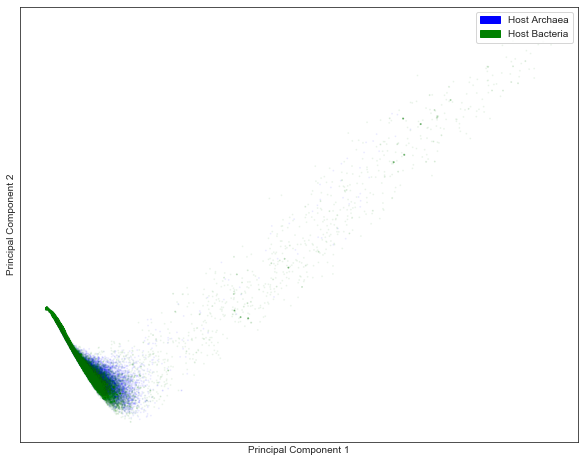

In [47]:
#label_name = {1:"Host Archaea", 2:"Host Bacteria"}
label_color_map = {0:'blue',1:'green'}
label_color = [label_color_map[c] for c in all_label]

# 2D PCA plot
fig = plt.figure(figsize=(10,8))
ax = plt.scatter(Y[:,0], Y[:,1], s=1, c=label_color, alpha=0.05)

plt.xticks([])
plt.yticks([])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
virus_patch = mpatches.Patch(color='blue', label='Host Archaea')
phage_patch = mpatches.Patch(color='green', label='Host Bacteria')
plt.legend(handles=[virus_patch,phage_patch],loc='upper right')

plt.show()
#fig.savefig('PCA_min_features_acr_2D.pdf')

# Step 2: Create, compile, fit autoencoder model
- use Keras, a high-level neural networks API that runs on top of librares like TensorFlow.

In [48]:
#split the data in training and test sets
Y = pd.Series(all_label)

x_train, x_test, y_train_og, y_test = train_test_split(all_sequence_no_dim_norm, Y, test_size=0.01, random_state=10)
print('Training set has', x_train.shape[0], 'rows and', x_train.shape[1], 'columns')
print('Test set has', x_test.shape[0], 'rows and', x_test.shape[1], 'columns')

Training set has 81999 rows and 500 columns
Test set has 829 rows and 500 columns


In [49]:
y_train = pd.Series(y_train_og).values

In [210]:
#plot original data, reconstructed data, residuals
def plot_reconstruction(data_norm, data_dec):
    plt.figure(figsize=(30,20))
    plt.subplot(3,1,1)
    ax1 = plt.imshow(data_norm, cmap="seismic", aspect="auto", vmin=0, vmax=1)
    cbar = plt.colorbar(ax1)
    plt.title('Original data', fontsize=25)
    plt.subplot(3,1,2)
    ax2 = plt.imshow(data_dec, cmap="seismic", aspect="auto", vmin=0, vmax=1)
    cbar = plt.colorbar(ax2)
    plt.title('Recondstruction', fontsize=25)
    plt.subplot(3,1,3)
    ax3 = plt.imshow(data_norm-data_dec, cmap="seismic", aspect="auto", vmin=-1, vmax=1)
    plt.gca().set_xticks(range(no_dim_features))
#    plt.gca().set_xticklabels(markers, fontsize=20)
    cbar = plt.colorbar(ax3)
    plt.title('Residuals', fontsize=25)
    plt.show()
    # print residual values
    print(sum(abs(data_norm-data_dec)))
    
#plot training history
def plot_history(autoencoder):
    fig = plt.figure(figsize=(6,4))
    plt.plot(autoencoder.history.history['loss'])
    plt.plot(autoencoder.history.history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss function')
    plt.legend(['Loss', 'Validation loss'])
    plt.show()

#plot reduced dimensions
def plot_encoded(x_train_encoded, y_train): 
    #label_name = {1:"Host Archaea", 2:"Host Bacteria"}
    label_color_map = {0:'orange',1:'blue'}
    label_color = [label_color_map[c] for c in y_train]

    virus_patch = mpatches.Patch(color='orange', label='Spacer from Archaea')
    phage_patch = mpatches.Patch(color='blue', label='Spacer from Bacteria')

    fig = plt.figure(figsize=(10,8))
    ax = plt.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=5, c=label_color, alpha=0.05)
    #cbar = plt.colorbar(ax, ticks=range(21))
    #cbar.ax.set_yticklabels(cell_types['cell type name'])
    #ax.set_facecolor('white')

    plt.legend(handles=[virus_patch,phage_patch],loc='upper right')

    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.show()

def plot_encoded_3D(x_train_encoded, y_train):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')

    label_color_map = {0:'orange',1:'blue'}
    label_color = [label_color_map[c] for c in y_train]
    
    ax.scatter(x_train_encoded[:,0], \
               x_train_encoded[:,1], \
               x_train_encoded[:,2], \
               c=label_color, alpha=0.1)

    ax.set_xlabel('Dim 1')
    ax.set_ylabel('Dim 2')
    ax.set_zlabel('Dim 3')
    
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    pylab.title("3D Embedding: ")
    pylab.show()
    return

In [51]:
reproduce(10)

#set dimensions of input and hidden layer
input_dim = no_dim_features
intermediate_1 = 150
intermediate_2 = 75
intermediate_3 = 15
latent_dim = 3

input_data = tf.keras.layers.Input(shape=(input_dim,))
#encode the input with a dense layer
encoded_1 = tf.keras.layers.Dense(intermediate_1, activation='relu')(input_data)
encoded_2 = tf.keras.layers.Dense(intermediate_2, activation='relu')(encoded_1)
encoded_3 = tf.keras.layers.Dense(intermediate_3, activation='relu')(encoded_2)
encoded_4 = tf.keras.layers.Dense(latent_dim, activation='relu')(encoded_3)
#decode the encoded input to its reconstruction
decoded_1 = tf.keras.layers.Dense(intermediate_3, activation='relu')(encoded_4)
decoded_2 = tf.keras.layers.Dense(intermediate_2, activation='relu')(decoded_1)
decoded_3 = tf.keras.layers.Dense(intermediate_1, activation='relu')(decoded_2)
decoded_4 = tf.keras.layers.Dense(input_dim, activation='sigmoid')(decoded_3)

#autoencoder_2 maps the input to the output
autoencoder_4 = tf.keras.models.Model(input_data, decoded_4)

#encoder_2 maps the input to the latent representation
encoder_4 = tf.keras.models.Model(input_data, encoded_4)

#compile the model and set the desired optimizer and loss function
autoencoder_4.compile(optimizer='adam', loss='mean_squared_error')
autoencoder_4.summary()
autoencoder_4.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=False,
                validation_data=(x_test, x_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 150)               75150     
_________________________________________________________________
dense_9 (Dense)              (None, 75)                11325     
_________________________________________________________________
dense_10 (Dense)             (None, 15)                1140      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 48        
_________________________________________________________________
dense_12 (Dense)             (None, 15)                60        
_________________________________________________________________
dense_13 (Dense)             (None, 75)                1200      
__________

Epoch 62/100
81999/81999 [==============================] - 4s 43us/sample - loss: 0.0052 - val_loss: 0.0051
Epoch 63/100
81999/81999 [==============================] - 4s 43us/sample - loss: 0.0052 - val_loss: 0.0051
Epoch 64/100
81999/81999 [==============================] - 3s 42us/sample - loss: 0.0052 - val_loss: 0.0051
Epoch 65/100
81999/81999 [==============================] - 3s 42us/sample - loss: 0.0052 - val_loss: 0.0051
Epoch 66/100
81999/81999 [==============================] - 3s 42us/sample - loss: 0.0052 - val_loss: 0.0051
Epoch 67/100
81999/81999 [==============================] - 3s 42us/sample - loss: 0.0052 - val_loss: 0.0051
Epoch 68/100
81999/81999 [==============================] - 3s 42us/sample - loss: 0.0052 - val_loss: 0.0051
Epoch 69/100
81999/81999 [==============================] - 3s 42us/sample - loss: 0.0052 - val_loss: 0.0051
Epoch 70/100
81999/81999 [==============================] - 3s 42us/sample - loss: 0.0052 - val_loss: 0.0051
Epoch 71/100
81999/

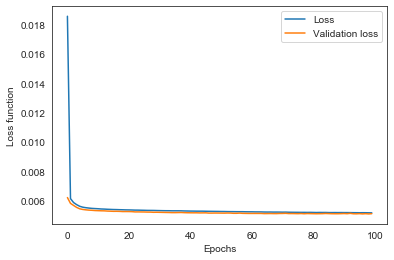

In [52]:
plot_history(autoencoder_4)

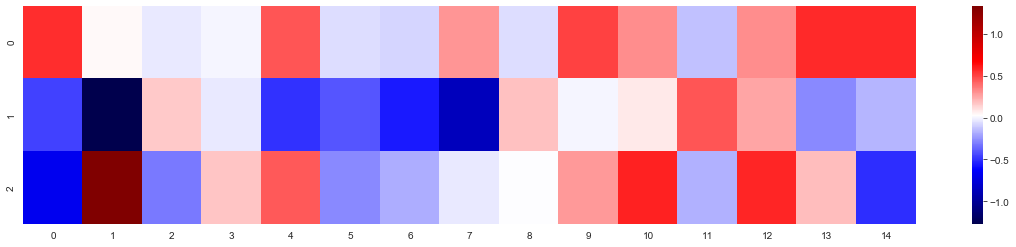

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

#get the weights of the hidden layer
weights=autoencoder_4.layers[5].get_weights()
#visualize the weights
plt.figure(figsize=(20,4))
sns.heatmap(data=weights[0], cmap='seismic')
#plt.gca().set_xticklabels(range(no_dim_features))
plt.show()

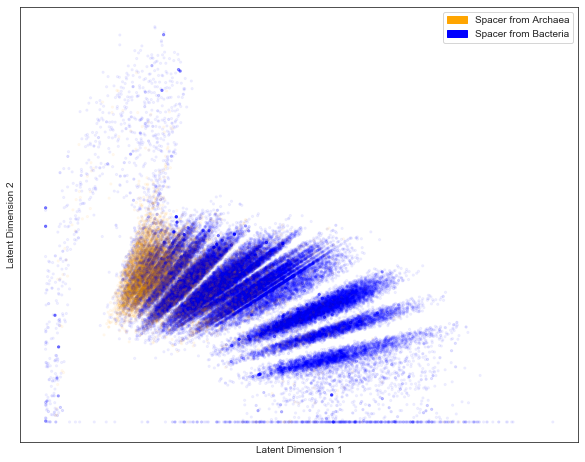

In [211]:
#encoder input into latent dimensions
x_enc_4 = encoder_4.predict(x_train, batch_size=256)
plot_encoded(x_enc_4, y_train)

No handles with labels found to put in legend.


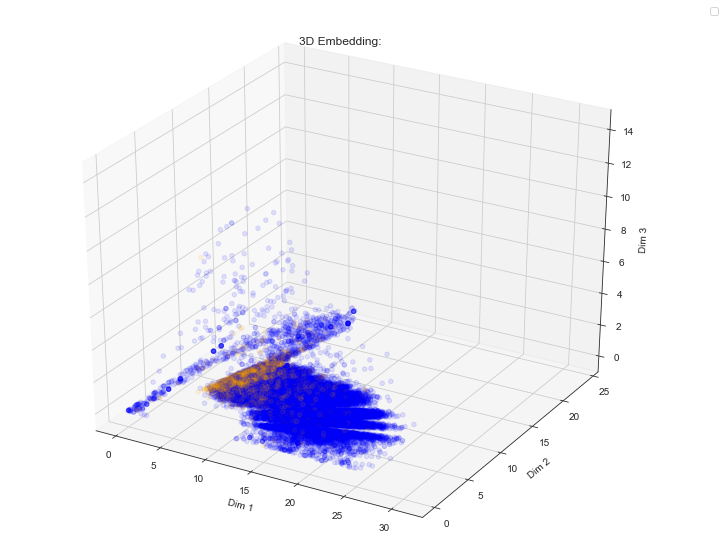

In [212]:
plot_encoded_3D(x_enc_4, y_train_og)

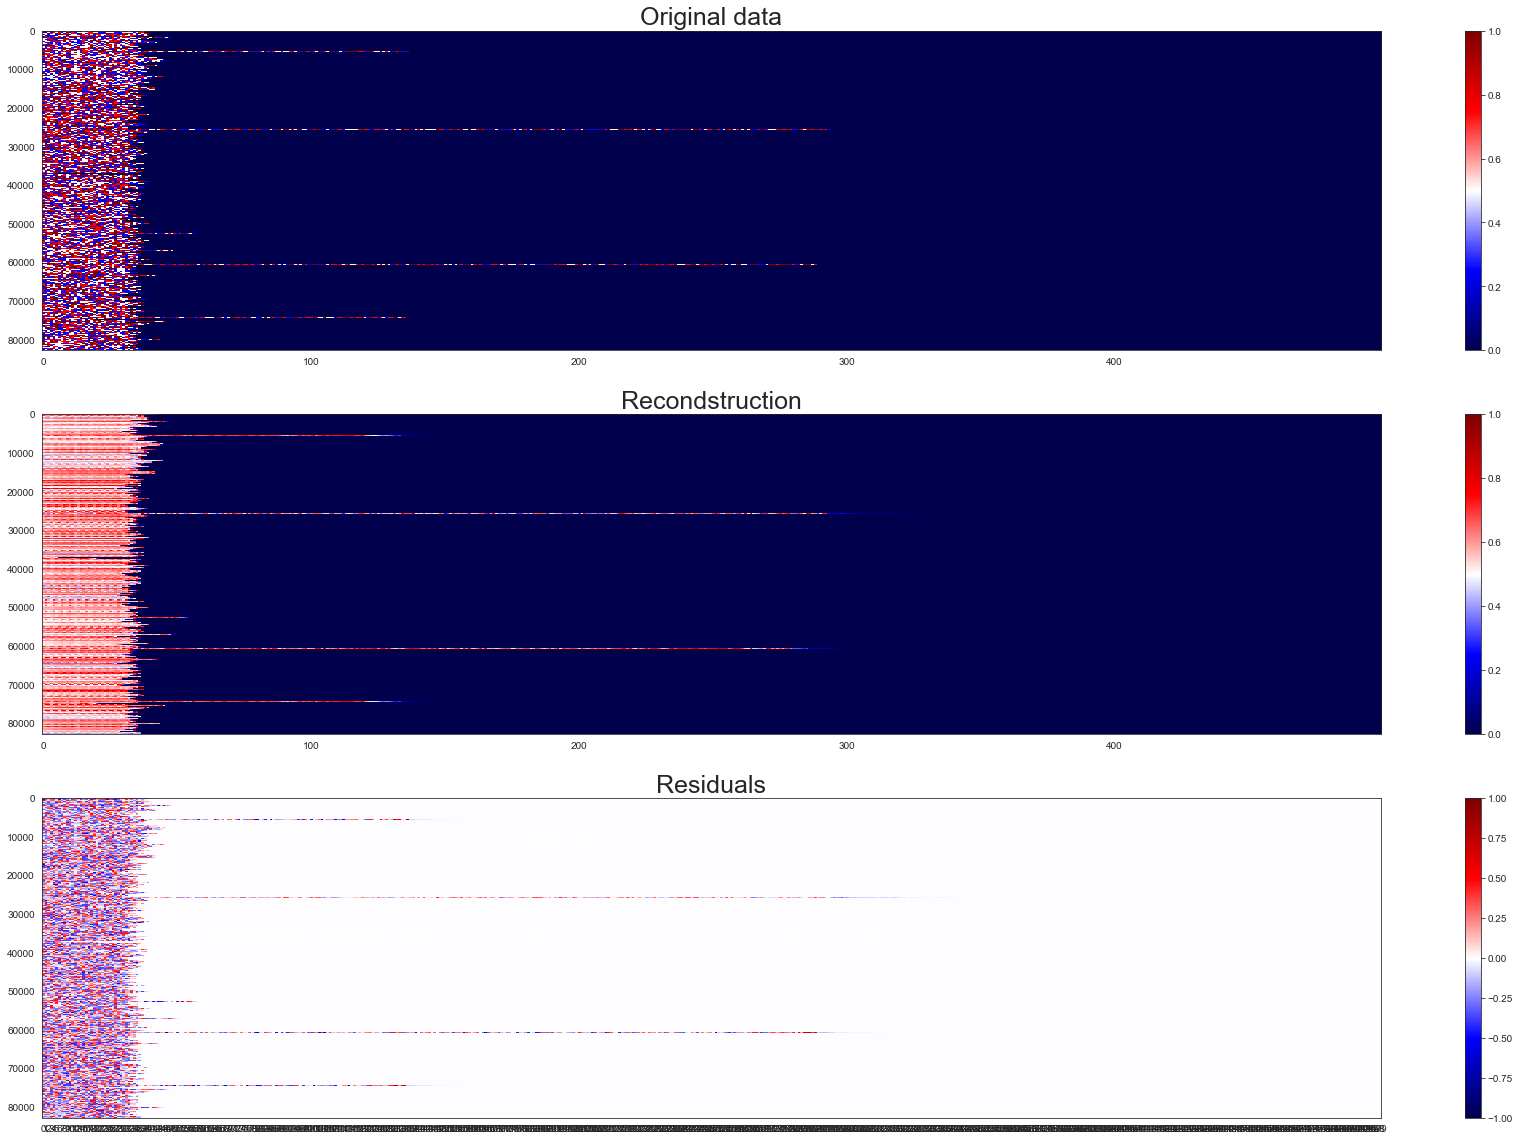

701185.4436380566


In [56]:
#reconstruct the data
data_dec_4 = autoencoder_4.predict(all_sequence_no_dim_norm)
plot_reconstruction(all_sequence_no_dim_norm, data_dec_4)

In [155]:
all_des = all_des_ar_spacer + all_des_ba_spacer
all_des[0]

'ref|NC_015518|  Acidianus hospitalis W1 chromosome 1565144-1565176'

In [65]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0).fit_predict(x_enc_4)

In [116]:
y_train = pd.Series(y_train_og).values
y_train_index = y_train_og.index.array
d = {'train index':pd.Series(y_train_index),'kmeans':pd.Series(kmeans)}

In [117]:
df = pd.DataFrame(d)

In [118]:
df

,train index,kmeans
0,59988,5
1,25126,3
2,76919,5
3,24235,1
4,39221,4
5,34050,1
6,6424,4
7,18421,6
8,64390,9
9,13204,2


In [199]:
cluster0 = df.loc[df['kmeans']==0]
res_cluster0 = [all_des[i] for i in cluster0['train index'].tolist()]
res_cluster0.sort()

with open('cluster0.txt', 'w') as f:
    for item in res_cluster0:
        f.write("%s\n" % item)

In [200]:
cluster1 = df.loc[df['kmeans']==1]
res_cluster1 = [all_des[i] for i in cluster1['train index'].tolist()]
res_cluster1.sort()

with open('cluster1.txt', 'w') as f:
    for item in res_cluster1:
        f.write("%s\n" % item)

In [202]:
cluster2 = df.loc[df['kmeans']==2]
res_cluster2 = [all_des[i] for i in cluster2['train index'].tolist()]
res_cluster2.sort()

with open('cluster2.txt', 'w') as f:
    for item in res_cluster2:
        f.write("%s\n" % item)

In [203]:
cluster3 = df.loc[df['kmeans']==3]
res_cluster3 = [all_des[i] for i in cluster3['train index'].tolist()]
res_cluster3.sort()

with open('cluster3.txt', 'w') as f:
    for item in res_cluster3:
        f.write("%s\n" % item)

In [204]:
cluster4 = df.loc[df['kmeans']==4]
res_cluster4 = [all_des[i] for i in cluster4['train index'].tolist()]
res_cluster4.sort()

with open('cluster4.txt', 'w') as f:
    for item in res_cluster4:
        f.write("%s\n" % item)

In [205]:
cluster5 = df.loc[df['kmeans']==5]
res_cluster5 = [all_des[i] for i in cluster5['train index'].tolist()]
res_cluster5.sort()

with open('cluster5.txt', 'w') as f:
    for item in res_cluster5:
        f.write("%s\n" % item)

In [206]:
cluster6 = df.loc[df['kmeans']==6]
res_cluster6 = [all_des[i] for i in cluster6['train index'].tolist()]
res_cluster6.sort()

with open('cluster6.txt', 'w') as f:
    for item in res_cluster6:
        f.write("%s\n" % item)

In [207]:
cluster7 = df.loc[df['kmeans']==7]
res_cluster7 = [all_des[i] for i in cluster7['train index'].tolist()]
res_cluster7.sort()

with open('cluster7.txt', 'w') as f:
    for item in res_cluster7:
        f.write("%s\n" % item)

In [208]:
cluster8 = df.loc[df['kmeans']==8]
res_cluster8 = [all_des[i] for i in cluster8['train index'].tolist()]
res_cluster8.sort()

with open('cluster8.txt', 'w') as f:
    for item in res_cluster8:
        f.write("%s\n" % item)

In [209]:
cluster9 = df.loc[df['kmeans']==9]
res_cluster9 = [all_des[i] for i in cluster9['train index'].tolist()]
res_cluster9.sort()

with open('cluster9.txt', 'w') as f:
    for item in res_cluster9:
        f.write("%s\n" % item)

In [197]:
res_cluster0.sort()

In [198]:
res_cluster0

['ref|NC_000853|  Thermotoga maritima MSB8 chromosome 1707-1744',
 'ref|NC_000853|  Thermotoga maritima MSB8 chromosome 1779970-1780006',
 'ref|NC_000853|  Thermotoga maritima MSB8 chromosome 1780037-1780073',
 'ref|NC_000853|  Thermotoga maritima MSB8 chromosome 1780503-1780539',
 'ref|NC_000853|  Thermotoga maritima MSB8 chromosome 2043-2079',
 'ref|NC_000853|  Thermotoga maritima MSB8 chromosome 2377-2413',
 'ref|NC_000853|  Thermotoga maritima MSB8 chromosome 2576-2612',
 'ref|NC_000853|  Thermotoga maritima MSB8 chromosome 2909-2945',
 'ref|NC_000853|  Thermotoga maritima MSB8 chromosome 369467-369505',
 'ref|NC_000853|  Thermotoga maritima MSB8 chromosome 409526-409562',
 'ref|NC_000853|  Thermotoga maritima MSB8 chromosome 409862-409900',
 'ref|NC_000853|  Thermotoga maritima MSB8 chromosome 410326-410363',
 'ref|NC_000853|  Thermotoga maritima MSB8 chromosome 410592-410628',
 'ref|NC_000853|  Thermotoga maritima MSB8 chromosome 410790-410826',
 'ref|NC_000853|  Thermotoga marit